# Week 4 - Neural Networks

Last week you learned to implement (multiclass) logistic regression. Below you'll find recap of the concepts we have used so far (in order of introduction):

* Likelihood function
* Cost/Error/Loss function
* Mean Squared Error
* Gradient descent
* Learning rate
* Epochs
* Batch size / Stochastic Gradient Descent (SGD)
* Momentum
* Root Mean Squared Propagation (RMSProp)
* Sigmoid function
* Binary Cross Entropy Loss
* Softmax function
* Cross Entropy Loss

These are fundamental building blocks that you must understand for applying neural networks well. If any of the concepts are unclear to you today is a good day to solidify your understanding.

# Imports

In [7]:
# Package imports
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.linear_model

# Why Neural Networks

Last week you learned how to apply logistic regression. However, in the last example of last week's notebook you have seen that it failed to classify a simple XOR relationship.

Today we will show this problem on a dataset with a similar structure:

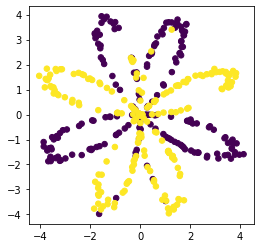

In [8]:
# dataset generation function
def dgp(N, a):
    """
    Purpose:
        Data generating function.
        2 classes "flowers" data with non-linear structure
    Inputs:
        N   integer, number of observations
        a   double, maximum ray of the flower
    Outputs:
        X   (N,2) matrix of features
        t   (N,) vector, boolean target data
    """
    P = int(N/2)
    D = 2               # fixed number of classes
    X = np.zeros((N,D)) # data matrix where each row is a single example
    t = np.zeros(N)     # labels vector (0 for red, 1 for blue)

    for j in range(D):
        ind = range(P*j,P*(j+1))
        f = np.linspace(j*np.pi,(j+1)*np.pi,P) + np.random.randn(P)*0.2 # theta
        r = a*np.sin(4*f) + np.random.randn(P)*0.2 # radius
        X[ind] = np.c_[r*np.sin(f), r*np.cos(f)]
        t[ind] = j
        
    return X,t

N = 400
M = 2

X, t = dgp(N, 4)
K = len(np.unique(t))

# Visualize the data:
plt.scatter(X[:,0], X[:,1], c=t, s=30)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Accuracy: 0.44


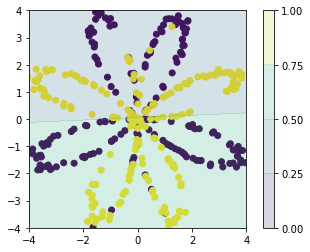

In [10]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X,t)

# Print accuracy
acc = clf.score(X,t)
print(f'Accuracy: {acc:.2f}')

# Make prediction mesh
x1_mesh, x2_mesh = np.meshgrid(np.linspace(-4, 4, 100), 
                               np.linspace(-4, 4, 100))
X_mesh = np.array([x1_mesh, x2_mesh]).reshape(2, -1).T
y_mesh = clf.predict_proba(X_mesh)[:,1].reshape(100,100)


# Plot
plt.scatter(X[:, 0], X[:, 1], c=t)
plt.contourf(x1_mesh, x2_mesh, y_mesh.reshape(100, 100), # the mesh
             np.linspace(0, 1, 5), alpha=0.2) # the bar at the right
            
plt.colorbar()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Solution with Feature Engineering

One solution is to add additional features such as polynomial, or gaussian basis transformations. This can work reasonably well, as shown below. But it requires quite some effort to come up with good features and even then performance is not so good (especially in the center).

Accuracy with Polynomial features (degree=3): 0.82 


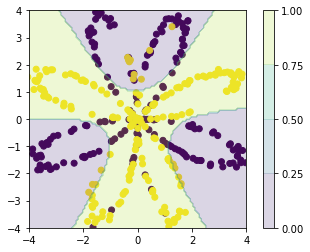

In [11]:
# create features
from sklearn.preprocessing import PolynomialFeatures
d = 3 #polynomial degree
Phi = PolynomialFeatures(degree=d).fit_transform(X)
Phi_mesh = PolynomialFeatures(degree=d).fit_transform(X_mesh)

# train model
clf = sklearn.linear_model.LogisticRegression()
clf.fit(Phi,t)
acc = clf.score(Phi,t)

# predict mesh
y_mesh = clf.predict_proba(Phi_mesh)[:,1].reshape(100,100)


# print accuracy
print(f'Accuracy with Polynomial features (degree={d}): {acc:.2f} ')

# Plot
plt.scatter(X[:, 0], X[:, 1], c=t)
plt.contourf(x1_mesh, x2_mesh, y_mesh > 0.5, # the mesh
             np.linspace(0, 1, 5), alpha=0.2) # the bar at the right          
plt.colorbar()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# Neural Networks Solution

During last weeks lecture you learned about neural networks. 
Today we will implement this using [Keras](https://keras.io). Please take a look at its website to learn more about it.

For an interactive illustration of the inner workings of neural networks take a look [here](https://playground.tensorflow.org/)

Below we will implement a basic neural network.
The code we provide is complete and heavily annotated.

In [12]:
import keras

13/13 [==============================] - 0s 476us/step - loss: 0.5423 - accuracy: 0.6600
Accuracy with NNet: 0.66 


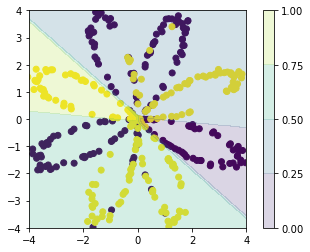

In [13]:
# -------- BASIC MODEL --------------

# import these submodules directly for readability
# do this for often used submodules
from keras.models import Sequential
from keras.layers import Dense

# indicate we want to use a sequential neural network
model = Sequential()

# add hidden layer
model.add(Dense(units=2,                  # number of units the layer has
                activation='tanh',        # activation function
                 ))             
# add output layer
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', # choose loss function to optimize
              optimizer='rmsprop',        # choose optimizer to do the above
              metrics=['accuracy'])       # choose metrics to print

# fit
history = model.fit(X,t,
                    epochs=int(1e4),      
                    batch_size=400,
                    verbose=0,            # dont print loss/accuracy
#                     validation_split=0.1,# take 25% of data for validation
#                     validation_data=(X_val,t_val), # alternative way
                   )

# -------- VISUALIZE PREDICTIONS  --------------

# get loss and accuracy
loss, acc = model.evaluate(X,t)

# make predictions over the mesh grid
y_mesh = model.predict(X_mesh).reshape(100,-1)

# print accuracy
print(f'Accuracy with NNet: {acc:.2f} ')

# Plot
plt.scatter(X[:, 0], X[:, 1], c=t)
plt.contourf(x1_mesh, x2_mesh, y_mesh, # the mesh
             np.linspace(0, 1, 5), alpha=0.2, # the bar at the right
             ) # color map
plt.colorbar()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

**@Exercise:**

**A) Simplify the code above to a logistic regression.**

*Answer here*

Just remove the hidden layer.
You could also change the hidden layer's activation function to 'linear', but that's not efficient.

**B) Increase the number of hidden nodes (try: 2,3,20). Describe what happens. Use the terms: model capacity and overfitting.**

*Answer here*

More hidden nodes means that the model has more capacity to fit complex relationships, therefore it is more likely to overfit on the training set.

**C) Change the optimizer to SGD, with momentum of 0.9. Does it affect the results? Why / Not?**

*Answer here*

It doesn't change the results too much, because they are both decent optimizers. RMSProp might be quicker though because it adapts the learning rate for each parameter.

**D) Add weight decay. Does it help (inspect visually as we dont have a validation set)**

*Answer here*

Yes it helps, it can mitigate the overfitting that happens when there are many hidden nodes.


**E) Change the activation function in the hidden layer to sigmoid. Does it affect the results? Why / Not?**

*Answer here*

Not really. The sigmoid and tanh activation function are very similar and the differences become more apparent in deep networks.


**E) Rewrite the problem as a multiclass classification task. You'll have to make 4 changes, the first one is rewriting vector t as a matrix T with K=2 columns.**

*Answer here*

Changes:

1. Vector t becomes matrix T
2. Output units becomes 2
3. Output activation becomes softmax
4. Loss function becomes categorical_crossentropy
5. Optional: The code to plot the results needs an adjustment: the predictions are now also a matrix with two columns, where only the second column should be kept. 

## Exercises:

Last week we showed you how logistic regression is quite good at some image classification tasks. Today we ask you to see if you can get better performance with a neural network.

**Task:**
* We provide you with the code to load the data.
* It is up to you to create a neural network in Keras.

**Tips:**

* model.fit() accepts validation set to keep track of loss/accuracy during training
* keras documentation contains starter code to visualize this

# Digits

In [7]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

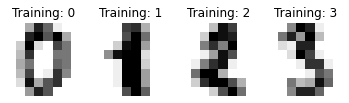

In [8]:
# Starter code [1/2]
# load data
digits = sklearn.datasets.load_digits()

# print examples
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [9]:
# Starter code [2/2]
# Vectorize the pixel matrices of each observation so we end up with a feature matrix of all observations.
N = digits.images.shape[0]
K = 10
X = digits.images.reshape((N,-1))
t = digits.target
  
# train test split
X_train, X_val, t_train, t_val = train_test_split(X,t,random_state=42)

# normalize inputs (speeds up learning for SGD)
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_val = norm.transform(X_val)

# Turn our target into a matrix (sklearn accepts both t_train and T_train, but our implementation only accepts T_train)
T_train = np.zeros((X_train.shape[0],K))
T_val = np.zeros((X_val.shape[0],K))
for c in range(K):
    T_train[t_train==c,c] = 1
    T_val[t_val==c,c] = 1

In [10]:
# Starter code [3/3] logistic regression score
clf = sklearn.linear_model.LogisticRegression().fit(X_train,t_train)

acc_train = clf.score(X_train,t_train)
acc_val = clf.score(X_val,t_val)

print('**** LOGISTIC REGRESSION ****')
print(f'Train accuracy: {acc_train}')
print(f'Test accuracy: {acc_val}')

**** LOGISTIC REGRESSION ****
Train accuracy: 0.9502598366740905
Test accuracy: 0.9488888888888889


**### START YOUR CODE HERE ###**

In [11]:
# -------- BASIC MODEL --------------

# import these submodules directly for readability
# do this for often used submodules
from keras.models import Sequential
from keras.layers import Dense

# indicate we want to use a sequential neural network
model = Sequential()

# add hidden layer(s)
model.add(Dense(units=50,                  # number of units the layer has
                  activation='tanh',        # activation function
                  ))             
# add output layer
model.add(Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', # choose loss function to optimize
              optimizer='rmsprop',        # choose optimizer to do the above
              metrics=['accuracy'])       # choose metrics to print

# fit
history = model.fit(X_train,T_train,
                    epochs=int(1e3),      
                    batch_size=X_train.shape[0],
                    verbose=0,            # dont print loss/accuracy
#                     validation_split=0.1,# take 25% of data for validation
                    validation_data=(X_val,T_val), # alternative way
                   )

15/15 [==============================] - 0s 1ms/step - loss: 0.0894 - accuracy: 0.9800
Validation Accuracy: 0.9800000190734863


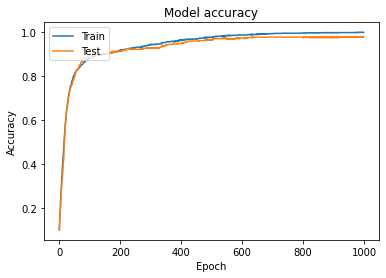

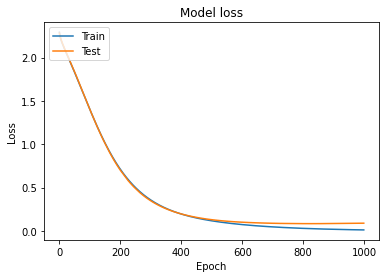

In [12]:
# -------- VISUALIZE TRAINING HISTORY  --------------

# get loss and accuracy
loss, acc = model.evaluate(X_val,T_val)

print(f'Validation Accuracy: {acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Conclusion: With some tuning we got an accuracy that is slightly better than logistic regression. In the plot above the test error even increase after a while again, so we might be better off by using 'Early Stopping'.**

**### END YOUR CODE HERE ###**

## News Group Classification

In [13]:
# Starter code [1/2]
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
data_train = fetch_20newsgroups(subset='train', categories=categories)
data_val = fetch_20newsgroups(subset='test', categories=categories)

# Transform the raw text into a matrix of word counts (for details see documentation of sklearn)
# This concept is called: Bag-of-Words
countVec = CountVectorizer().fit(data_train.data)
train_counts = countVec.transform(data_train.data)
test_counts = countVec.transform(data_val.data)

# reweight words by importance based on Tfidf (for details see documentation of sklearn)
Tfidf = TfidfTransformer().fit(train_counts)
X_train = Tfidf.transform(train_counts)
X_val = Tfidf.transform(test_counts)

# normalize
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_val = norm.transform(X_val)

# don't store inputs as sparse matrix
X_train = X_train.todense()
X_val = X_val.todense()


# Create target
t_train = data_train.target
t_val = data_val.target

# Print example input data:
data_train.data[0]

'From: mangoe@cs.umd.edu (Charley Wingate)\nSubject: Benediktine Metaphysics\nLines: 24\n\nBenedikt Rosenau writes, with great authority:\n\n>     IF IT IS CONTRADICTORY IT CANNOT EXIST.\n\n"Contradictory" is a property of language.  If I correct this to\n\n\n      THINGS DEFINED BY CONTRADICTORY LANGUAGE DO NOT EXIST\n\nI will object to definitions as reality.  If you then amend it to\n\n      THINGS DESCRIBED BY CONTRADICTORY LANGUAGE DO NOT EXIST\n\nthen we\'ve come to something which is plainly false.  Failures in\ndescription are merely failures in description.\n\n(I\'m not an objectivist, remember.)\n\n\n-- \nC. Wingate        + "The peace of God, it is no peace,\n                  +    but strife closed in the sod.\nmangoe@cs.umd.edu +  Yet, brothers, pray for but one thing:\ntove!mangoe       +    the marv\'lous peace of God."\n'

In [14]:
# Starter code [2/2] logistic regression score
clf = sklearn.linear_model.LogisticRegression().fit(X_train,t_train)

acc_train = clf.score(X_train,t_train)
acc_val = clf.score(X_val,t_val)

print('**** LOGISTIC REGRESSION ****')
print(f'Train accuracy: {acc_train}')
print(f'Test accuracy: {acc_val}')

**** LOGISTIC REGRESSION ****
Train accuracy: 0.9859976662777129
Test accuracy: 0.8263157894736842


**### START YOUR CODE HERE**

In [15]:
# -------- BASIC MODEL --------------

# import these submodules directly for readability
# do this for often used submodules
from keras.models import Sequential
from keras.layers import Dense

# indicate we want to use a sequential neural network
model = Sequential()

# add hidden layer(s)
model.add(Dense(units=50,                  # number of units the layer has
                  activation='tanh',        # activation function
                  ))             


model.add(Dense(units=25,                  # number of units the layer has
                  activation='tanh',        # activation function
                  ))             

# add output layer
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', # choose loss function to optimize
              optimizer='rmsprop',        # choose optimizer to do the above
              metrics=['accuracy'])       # choose metrics to print

# fit
history = model.fit(X_train,t_train,
                    epochs=int(1e2),      
                    batch_size=X_train.shape[0],
                    verbose=0,            # dont print loss/accuracy
#                     validation_split=0.1,# take 25% of data for validation
                    validation_data=(X_val,t_val), # alternative way
                   )

18/18 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8368
Validation Accuracy: 0.8368421196937561


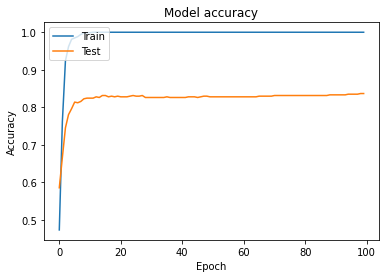

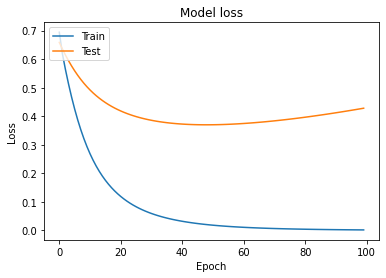

In [16]:
# -------- VISUALIZE TRAINING HISTORY  --------------

# get loss and accuracy
loss, acc = model.evaluate(X_val,t_val)

print(f'Validation Accuracy: {acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**### END YOUR CODE HERE ###**

# Conclusion

Today you have learned to implement neural networks in Keras and to apply the concepts you have learned in the course so far.

You have also seen that neural networks can estimate complex relationships without (much) feature engineering.